In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive

0: 384x640 43 heads, 1546.2ms
Speed: 33.8ms preprocess, 1546.2ms inference, 44.4ms postprocess per image at shape (1, 3, 384, 640)


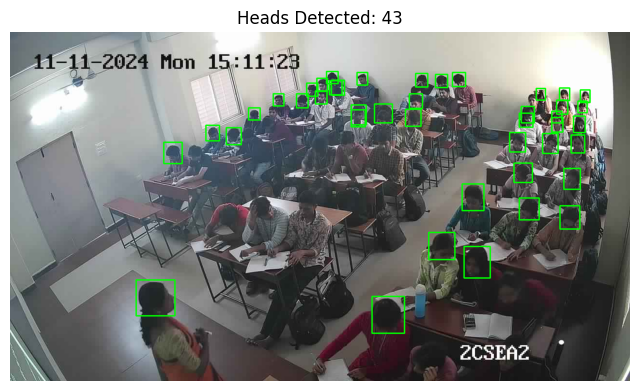


0: 384x640 19 heads, 1755.6ms
Speed: 8.8ms preprocess, 1755.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


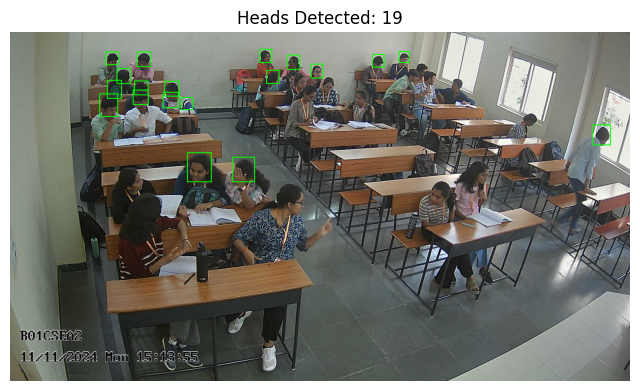


0: 384x640 7 heads, 951.2ms
Speed: 5.4ms preprocess, 951.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


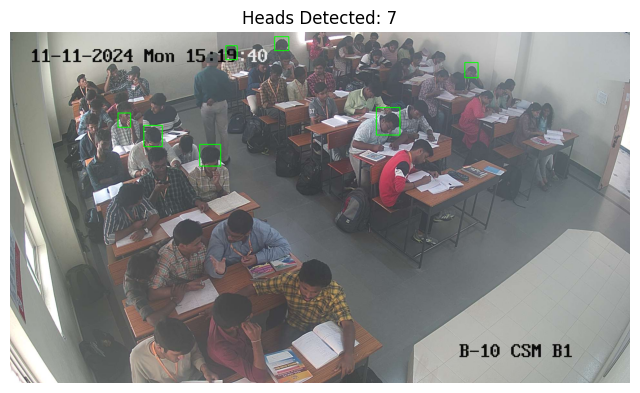


0: 384x640 41 heads, 931.6ms
Speed: 2.9ms preprocess, 931.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


KeyboardInterrupt: 

In [3]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from google.colab import drive
from ultralytics import YOLO


drive.mount('/content/drive')


dataset_path = '/content/drive/My Drive/College/archive/Classroom-Data (3)/Classroom-Data/images13.4/images'
output_path = '/content/drive/My Drive/HeadDetectionResults'


if not os.path.exists(output_path):
    os.makedirs(output_path)


model_path = "/content/drive/My Drive/College/medium.pt"
model = YOLO(model_path)

def detect_heads(image):
    """Detect heads using YOLOv8 and return bounding boxes."""
    results = model(image)
    heads = []
    for result in results:
        for box in result.boxes.xyxy:
            x, y, x2, y2 = map(int, box[:4])
            heads.append([x, y, x2, y2])
    return heads


def process_image(image_path):
    """Detect heads, draw bounding boxes, display, and save the image."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    heads = detect_heads(rgb_image)


    for x, y, x2, y2 in heads:
        cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)


    filename = os.path.basename(image_path)
    save_path = os.path.join(output_path, filename)
    cv2.imwrite(save_path, image)


    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Heads Detected: {len(heads)}')
    plt.axis("off")
    plt.show()

    return len(heads)


image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

results = []
for image_path in image_files:
    num_heads = process_image(image_path)
    if num_heads is not None:
        results.append((image_path, num_heads))


print(f"Processed {len(results)} images. Total heads detected: {sum(r[1] for r in results)}")
